In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import utils

c:\Users\perei\miniconda3\envs\xai\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset_path = "data/airline_passenger_satisfaction.csv"
df = pd.read_csv(dataset_path)
df


,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,...,4,4,5,3,3,4,5,3,5,Satisfied


In [3]:
print(df.columns)

Index(['ID', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')


In [4]:
df = utils.pre_process_df()
df

,Age,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Check-in Service,Online Boarding,Gate Location,On-board Service,...,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Female,Male,First-time,Returning,Business,Personal
0,48,2,821,2,5,3,4,3,3,3,...,3,5,5,0,0,1,1,0,1,0
1,35,2,821,26,39,2,3,5,2,5,...,2,5,5,1,1,0,0,1,1,0
2,41,2,853,0,0,4,4,5,4,3,...,4,3,3,1,0,1,0,1,1,0
3,50,2,1905,0,0,2,3,4,2,5,...,2,5,5,1,0,1,0,1,1,0
4,49,2,3470,0,1,3,3,5,3,3,...,3,3,3,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,28,1,447,2,3,4,4,4,2,5,...,4,4,4,0,0,1,0,1,0,1
129876,41,1,308,0,0,5,5,3,4,5,...,3,2,5,0,0,1,0,1,0,1
129877,42,1,337,6,14,5,4,2,1,3,...,2,3,5,0,0,1,0,1,0,1
129878,50,1,337,31,22,4,3,4,1,4,...,5,3,5,1,0,1,0,1,0,1


In [5]:
df.columns

Index(['Age', 'Class', 'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Check-in Service',
       'Online Boarding', 'Gate Location', 'On-board Service', 'Seat Comfort',
       'Leg Room Service', 'Cleanliness', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction', 'Female',
       'Male', 'First-time', 'Returning', 'Business', 'Personal'],
      dtype='object')

In [6]:
# Check column types
non_numeric_columns = []
cols_w_missing_values = []

for col in df.columns:
    if not pd.api.types.is_integer_dtype(df[col]):
        non_numeric_columns.append((col, df[col].dtype))
    if df[col].isnull().sum() > 0:
        cols_w_missing_values.append(col)

# Print result
if len(non_numeric_columns) == 0:
    print("All columns are int or float.\n")
else:
    print("There are columns that are not int:")
    for col, dtype in non_numeric_columns:
        print(f"Column: {col}, Type: {dtype}")
        
        
if len(cols_w_missing_values) == 0:
    print("No columns have missing values.")
else:
    print("Columns with missing values:")
    for col in cols_w_missing_values:
        print(f"Column: {col}")

All columns are int or float.

No columns have missing values.


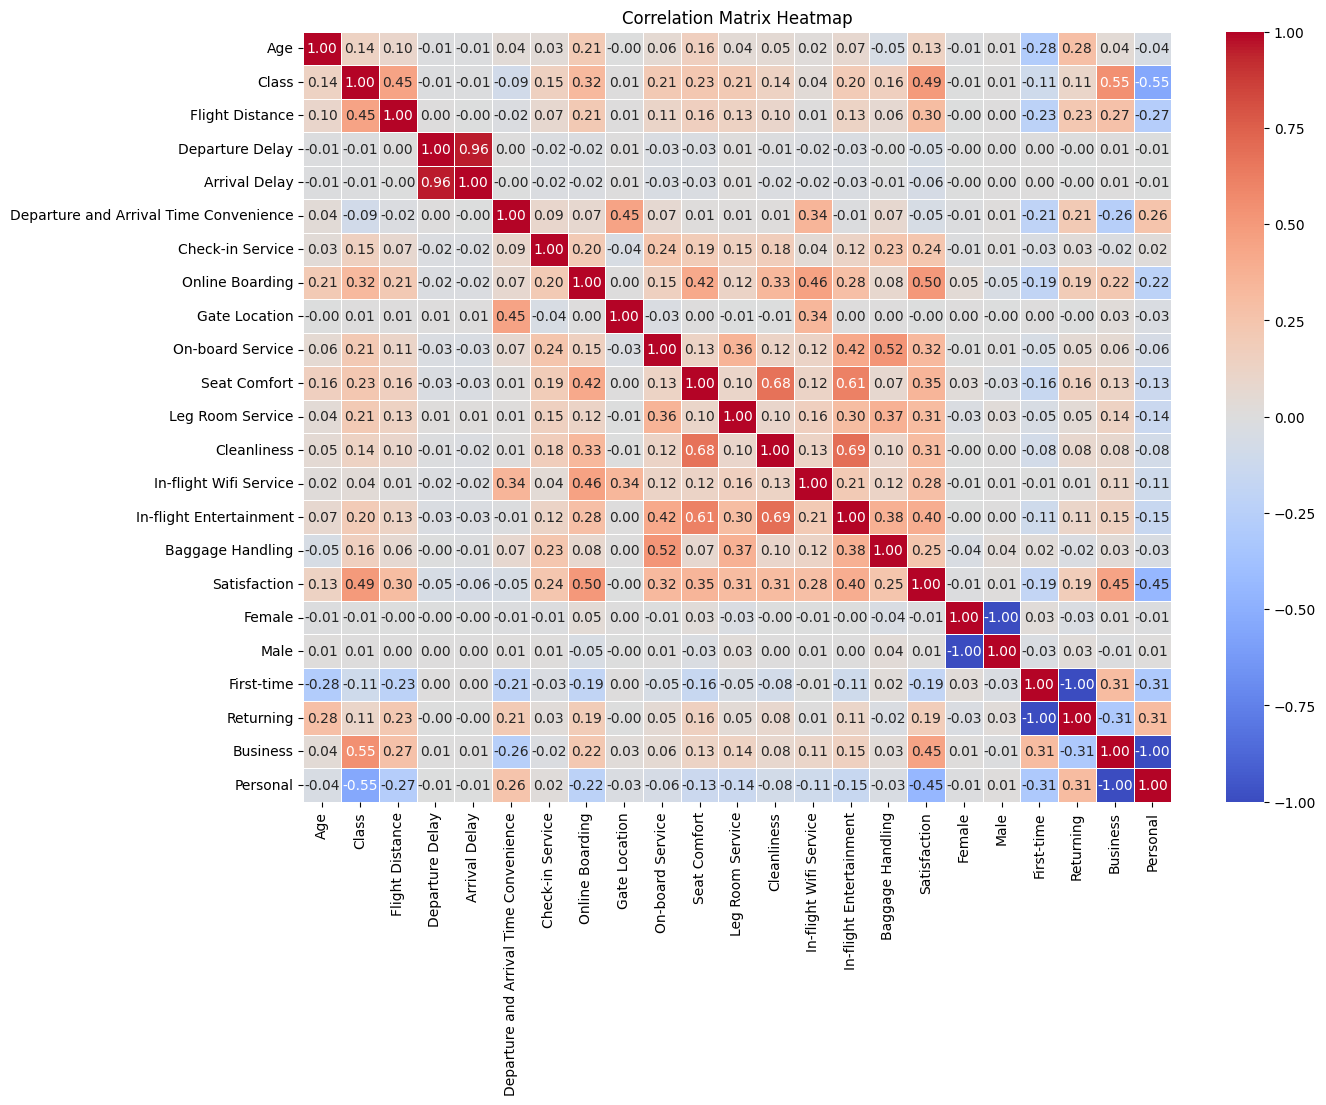

In [7]:
utils.visualize_correlation(df)

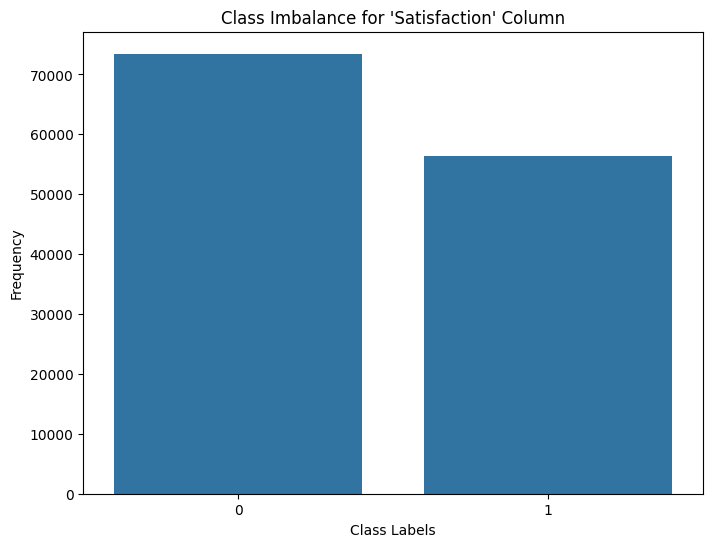

In [8]:
# Verify class imbalance of the Target

utils.visualize_class_imbalance(df)

As we see there is an imbalance in the classes. We will SMOTE to balance the classes.

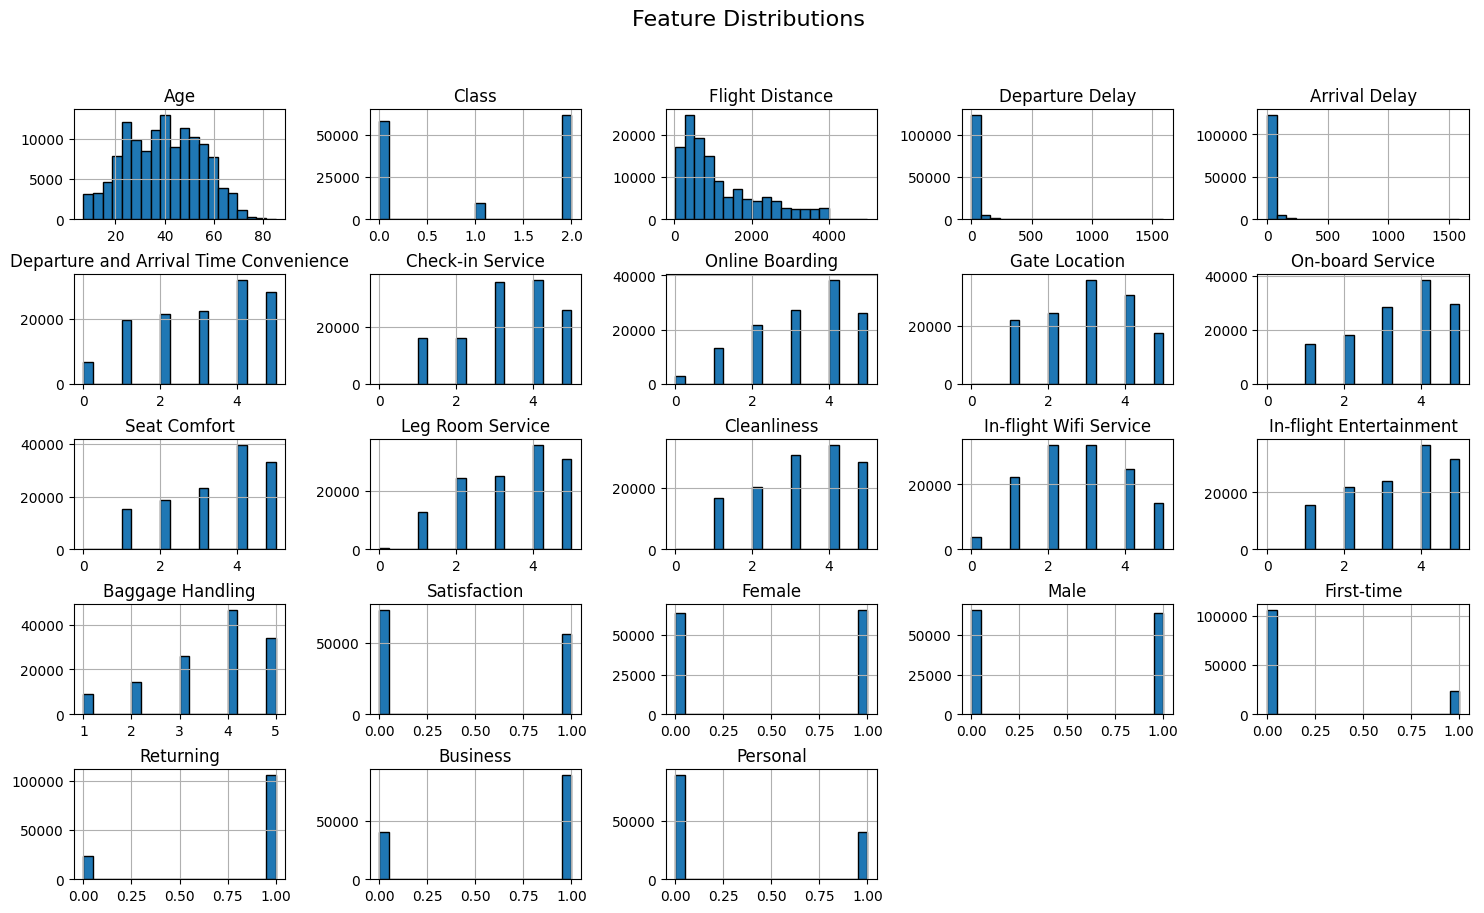

In [9]:
utils.visualize_feature_distributions(df)

In [10]:
## DECISION TREE

tree = DecisionTreeClassifier(random_state=42)

accuracy = utils.holdout_accuracy(df, tree, test_size=0.2)
cv_score = utils.cross_validation_acc(df, tree, cv_fold=10)

print(f"Holdout Accuracy: {accuracy}%\nCross-Validation Accuracy: {cv_score}%")

Holdout Accuracy: 94.256%
Cross-Validation Accuracy: 94.25%


Tree Depth: 37
Number of Leaves: 4199
Number of Nodes: 8397
Internal Nodes: 4198
Leaf Nodes: 4199


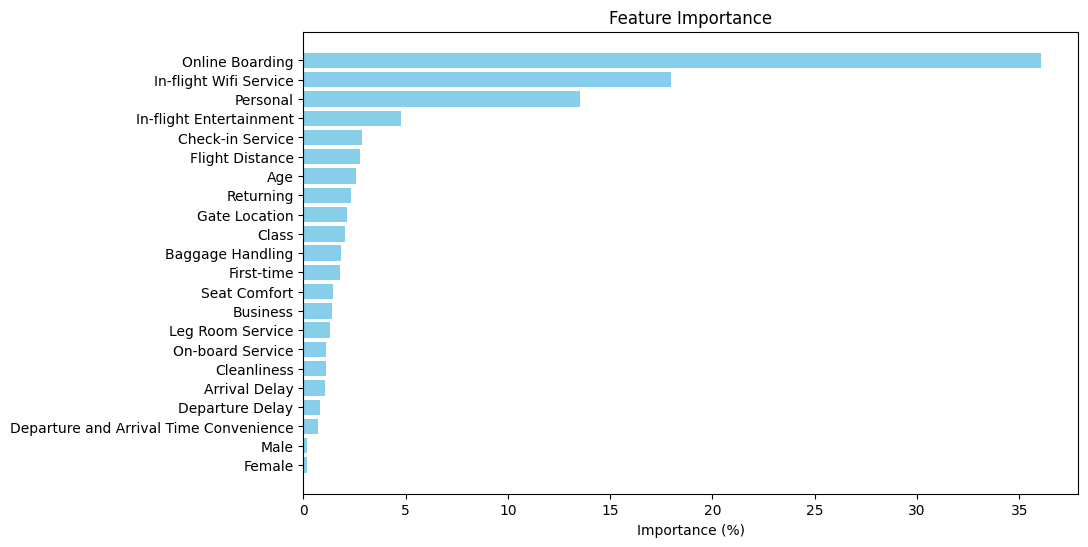

In [11]:
utils.analyze_tree_complexity(tree, df)

In [12]:
### RANDOM FOREST

forest = RandomForestClassifier(random_state=42)

accuracy = utils.holdout_accuracy(df, tree, test_size=0.2)
cv_score = utils.cross_validation_acc(df, tree, cv_fold=10)

print(f"Holdout Accuracy: {accuracy}%\nCross-Validation Accuracy: {cv_score}%")

Holdout Accuracy: 94.256%
Cross-Validation Accuracy: 94.25%


In [ ]:
utils.apply_simplification_based_xai(forest,df)

In [ ]:
utils.apply_feature_based_xai(forest,df)

In [ ]:
utils.apply_simplification_based_xai(forest,df)